In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [65]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, cross_val_score

In [176]:
path='/content/drive/MyDrive/DataForGood/config_files'

In [177]:
Goal4 = pd.read_excel(path+'/Goal4.xlsx')

In [178]:
Goal4.head()

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,TimeCoverage,UpperBound,LowerBound,BasePeriod,Source,GeoInfoUrl,FootNote,Age,Education level,Location,Nature,Quantile,Reporting Type,Sex,Type of skill,Units
0,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2013,11.0,2013,NaN,NaN,NaN,NaN,National Learning Assessment (NLA): Monitoring...,NaN,NaN,NaN,PRIMAR,NaN,C,NaN,G,BOTHSEX,SKILL_MATH,PERCENT
1,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2013,13.0,2013,NaN,NaN,NaN,NaN,National Learning Assessment (NLA): Monitoring...,NaN,NaN,NaN,PRIMAR,NaN,C,NaN,G,BOTHSEX,SKILL_READ,PERCENT
2,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2016,21.5,2016,NaN,NaN,NaN,NaN,National Learning Assessment (NLA): Monitoring...,NaN,NaN,NaN,GRAD23,NaN,C,NaN,G,MALE,SKILL_READ,PERCENT
3,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2016,22.5,2016,NaN,NaN,NaN,NaN,National Learning Assessment (NLA): Monitoring...,NaN,NaN,NaN,GRAD23,NaN,C,NaN,G,FEMALE,SKILL_READ,PERCENT
4,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2016,22.0,2016,NaN,NaN,NaN,NaN,National Learning Assessment (NLA): Monitoring...,NaN,NaN,NaN,GRAD23,NaN,C,NaN,G,BOTHSEX,SKILL_READ,PERCENT


In [179]:
Goal4.columns

Index(['Goal', 'Target', 'Indicator', 'SeriesCode', 'SeriesDescription',
       'GeoAreaCode', 'GeoAreaName', 'TimePeriod', 'Value', 'Time_Detail',
       'TimeCoverage', 'UpperBound', 'LowerBound', 'BasePeriod', 'Source',
       'GeoInfoUrl', 'FootNote', 'Age', 'Education level', 'Location',
       'Nature', 'Quantile', 'Reporting Type', 'Sex', 'Type of skill',
       'Units'],
      dtype='object')

In [180]:
len(Goal4)

191762

In [181]:
Goal4.drop(columns=['TimeCoverage','UpperBound','LowerBound','GeoInfoUrl','Location','Source','FootNote'],inplace=True,axis=1)

In [95]:
Goal4.isnull().sum()

Goal                      0
Target                    0
Indicator                 0
SeriesCode                0
SeriesDescription         0
GeoAreaCode               0
GeoAreaName               0
TimePeriod                0
Value                 12192
Time_Detail               0
BasePeriod           189486
Age                  191281
Education level       17879
Nature                    0
Quantile              55387
Reporting Type            0
Sex                   48829
Type of skill        175898
Units                     0
dtype: int64

## Filter and work on the country of focus

#### These countries can be spelt differently sometimes in the dataset (Example Congo Dem. Rep. can also be spelt out as Congo Democratic Republic)

In [182]:
#Country of focus
countries = ['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belize', 'Benin', 'Bhutan','Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo','Congo, Democratic Republic', 'Costa Rica', 'Croatia', "Côte d'Ivoire", 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia', 'Iran (Islamic Republic of)', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kosovo', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico', 'Micronesia (Federated States of)','Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Pakistan', 'Palau', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Romania', 'Russian Federation', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'Sao Tome and Principe', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Solomon Islands', 'Somalia', 'South Africa', 'South Sudan', 'Sri Lanka', 'Sudan', 'Suriname', 'Syrian Arab Republic', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine', 'United Republic of Tanzania', 'Uruguay', 'Uzbekistan', 'Vanuatu','Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']

In [ ]:
for i,j in enumerate(countries):
    print(i,j)

In [183]:
df_gsub=Goal4[Goal4['GeoAreaName'].isin(countries)]

In [194]:
df=df_gsub.copy()

In [185]:
df.head(3)

,Goal,Target,Indicator,SeriesCode,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,BasePeriod,Age,Education level,Nature,Quantile,Reporting Type,Sex,Type of skill,Units
0,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2013,11.0,2013,NaN,NaN,PRIMAR,C,NaN,G,BOTHSEX,SKILL_MATH,PERCENT
1,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2013,13.0,2013,NaN,NaN,PRIMAR,C,NaN,G,BOTHSEX,SKILL_READ,PERCENT
2,4,4.1,4.1.1,SE_TOT_PRFL,Proportion of children and young people achiev...,4,Afghanistan,2016,21.5,2016,NaN,NaN,GRAD23,C,NaN,G,MALE,SKILL_READ,PERCENT


In [186]:
df.isnull().sum()

Goal                      0
Target                    0
Indicator                 0
SeriesCode                0
SeriesDescription         0
GeoAreaCode               0
GeoAreaName               0
TimePeriod                0
Value                 10876
Time_Detail               0
BasePeriod           149460
Age                  150860
Education level        9486
Nature                    0
Quantile              27772
Reporting Type            0
Sex                   32908
Type of skill        143985
Units                     0
dtype: int64

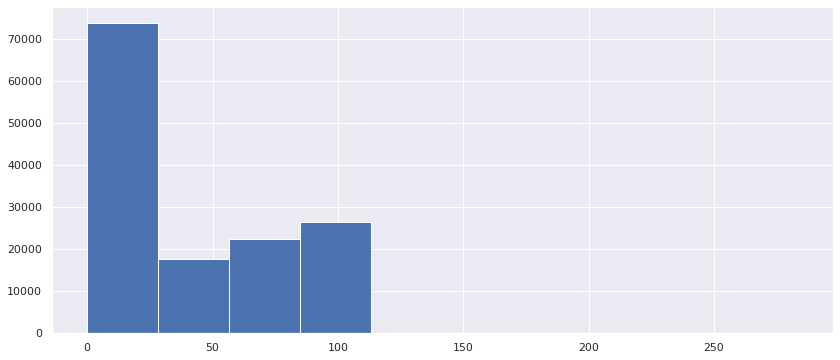

In [187]:
# value
df['Value'].hist()

In [188]:
df['Target'].value_counts()

4.1    70310
4.5    61097
4.c     8546
4.2     3022
4.a     2933
4.4     2811
4.b     1685
4.3      662
4.6       79
Name: Target, dtype: int64

In [243]:
df['Value'] = df['Value'].fillna(df['Value'].mean())

In [244]:
df['Value'].describe()

count    151145.000000
mean         36.292680
std          36.834731
min           0.000000
25%           1.001860
50%          23.969620
75%          72.130000
max         283.306330
Name: Value, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


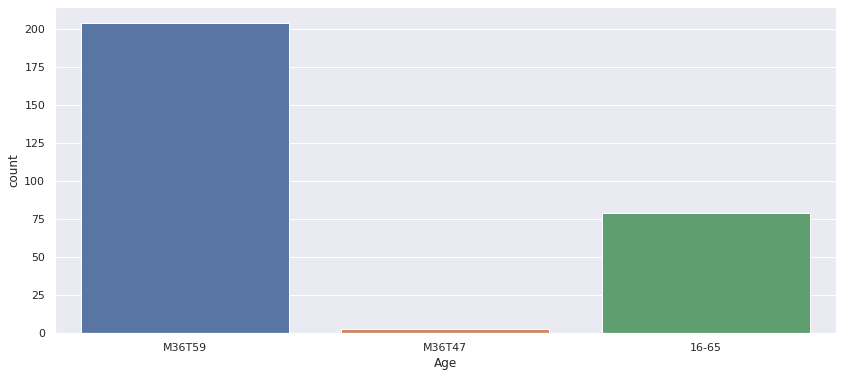

In [193]:
sns.countplot(df['Age'])

In [245]:
# Age
df['Age']=df['Age'].fillna('M36T59')

In [196]:
df['Age'].describe()

count     151145
unique         3
top       M36T59
freq      151063
Name: Age, dtype: object

In [197]:
df['Education level'].value_counts()

PRIMAR    46580
LOWSEC    46438
UPPSEC    43460
PREPRI     2229
SECOND     2057
GRAD23      851
_T           44
Name: Education level, dtype: int64

In [246]:
# educational level
df['Education level']=df['Education level'].fillna('PRIMAR')

In [199]:
df['Sex'].value_counts()

BOTHSEX    41562
FEMALE     38361
MALE       38314
Name: Sex, dtype: int64

In [247]:
# Sex
df['Sex']=df['Sex'].fillna('BOTHSEX')

In [201]:
df['Type of skill'].value_counts()

SKILL_MATH    2163
SKILL_READ    1978
EPRS           377
TRAF           361
ARSP           341
PCPR           339
CMFL           326
SOFT           316
COPA           305
INST           267
EMAIL          258
LITE            82
NUME            47
Name: Type of skill, dtype: int64

In [248]:
# type of skill

df['Type of skill']=df['Type of skill'].fillna('SKILL_MATH')

In [249]:
df.columns

Index(['Goal', 'Target', 'Indicator', 'SeriesCode', 'SeriesDescription',
       'GeoAreaCode', 'GeoAreaName', 'TimePeriod', 'Value', 'Time_Detail',
       'BasePeriod', 'Age', 'Education level', 'Nature', 'Quantile',
       'Reporting Type', 'Sex', 'Type of skill', 'Units'],
      dtype='object')

In [250]:
#select features for models
dfmod=df[['Target', 'Indicator', 'GeoAreaCode', 'GeoAreaName', 'Value',
       'Time_Detail', 'Age', 'Education level', 'Nature', 'Quantile',
       'Reporting Type', 'Sex', 'Type of skill', 'Units','SeriesCode']]

In [251]:
#clean up time again
dfmod['Time_Detail']=dfmod['Time_Detail'].replace(['2018-2019','2016-2017','2011-2012','2017-2018','2018-19','2014-2015','2013-2014','2017-18','2019-2020'],[2018,2016,2011,2017,2018,2014,2013,2017,2019])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [206]:
dfmod.head()

,Target,Indicator,GeoAreaCode,GeoAreaName,Value,Time_Detail,Age,Education level,Nature,Quantile,Reporting Type,Sex,Type of skill,Units,SeriesCode
0,4.1,4.1.1,4,Afghanistan,11.0,2013,M36T59,PRIMAR,C,NaN,G,BOTHSEX,SKILL_MATH,PERCENT,SE_TOT_PRFL
1,4.1,4.1.1,4,Afghanistan,13.0,2013,M36T59,PRIMAR,C,NaN,G,BOTHSEX,SKILL_READ,PERCENT,SE_TOT_PRFL
2,4.1,4.1.1,4,Afghanistan,21.5,2016,M36T59,GRAD23,C,NaN,G,MALE,SKILL_READ,PERCENT,SE_TOT_PRFL
3,4.1,4.1.1,4,Afghanistan,22.5,2016,M36T59,GRAD23,C,NaN,G,FEMALE,SKILL_READ,PERCENT,SE_TOT_PRFL
4,4.1,4.1.1,4,Afghanistan,22.0,2016,M36T59,GRAD23,C,NaN,G,BOTHSEX,SKILL_READ,PERCENT,SE_TOT_PRFL


In [207]:
dfmod.dtypes

Target              object
Indicator           object
GeoAreaCode          int64
GeoAreaName         object
Value              float64
Time_Detail         object
Age                 object
Education level     object
Nature              object
Quantile            object
Reporting Type      object
Sex                 object
Type of skill       object
Units               object
SeriesCode          object
dtype: object

In [252]:
dfmod.rename(columns={'Type of skill':'Skill'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [253]:
catcols=['Indicator','SeriesCode','Age','Sex','SeriesCode','Skill','Education level']

In [254]:
dfmod[catcols]=dfmod[catcols].astype('object')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [255]:
from sklearn.preprocessing import LabelEncoder
dfcop=dfmod.copy()
label_encoder = LabelEncoder()
for col in catcols:
  print(col)
  dfcop[col]=label_encoder.fit_transform(dfmod[col])

Indicator
SeriesCode
Age
Sex
SeriesCode
Skill
Education level


In [223]:
dfcop.head()

,Target,Indicator,GeoAreaCode,GeoAreaName,Value,Time_Detail,Age,Education level,Nature,Quantile,Reporting Type,Sex,Skill,Units,SeriesCode
0,4.1,0,4,Afghanistan,11.0,2013,2,3,C,NaN,G,0,9,PERCENT,25
1,4.1,0,4,Afghanistan,13.0,2013,2,3,C,NaN,G,0,10,PERCENT,25
2,4.1,0,4,Afghanistan,21.5,2016,2,0,C,NaN,G,2,10,PERCENT,25
3,4.1,0,4,Afghanistan,22.5,2016,2,0,C,NaN,G,1,10,PERCENT,25
4,4.1,0,4,Afghanistan,22.0,2016,2,0,C,NaN,G,0,10,PERCENT,25


In [256]:
dfcop=dfcop[['Indicator','GeoAreaCode','Value','Age','Education level','Sex','Skill','SeriesCode','Time_Detail']]

In [257]:
dfcop['Time_Detail']=dfcop['Time_Detail'].astype(int)

In [258]:
# split into train test
train=dfcop[dfcop['Time_Detail']<2019]
test=dfcop[dfcop['Time_Detail']==2019]

In [259]:
train['Indicator'].value_counts()

1     68404
6     61082
10     8516
8      2930
3      2804
5      2269
0      1903
9      1685
4       662
2       172
7        79
Name: Indicator, dtype: int64

In [260]:
# prepare data for models and subset train and test
X_train=train.drop(columns=['Time_Detail','GeoAreaCode'],axis=1)
y_train=train['Value']
X_test=test.drop(columns=['Time_Detail','GeoAreaCode'],axis=1)
y_test=test['Value']

In [261]:
X_train.columns

Index(['Indicator', 'Value', 'Age', 'Education level', 'Sex', 'Skill',
       'SeriesCode'],
      dtype='object')

In [262]:
train.isnull().sum()

Indicator          0
GeoAreaCode        0
Value              0
Age                0
Education level    0
Sex                0
Skill              0
SeriesCode         0
Time_Detail        0
dtype: int64

In [263]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [264]:
print("R-Squared on train dataset={}".format(dt.score(X_test,y_test)))   
print("R-Squared on test dataset={}".format(dt.score(X_test,y_test)))

R-Squared on train dataset=0.9999999940680175
R-Squared on test dataset=0.9999999940680175


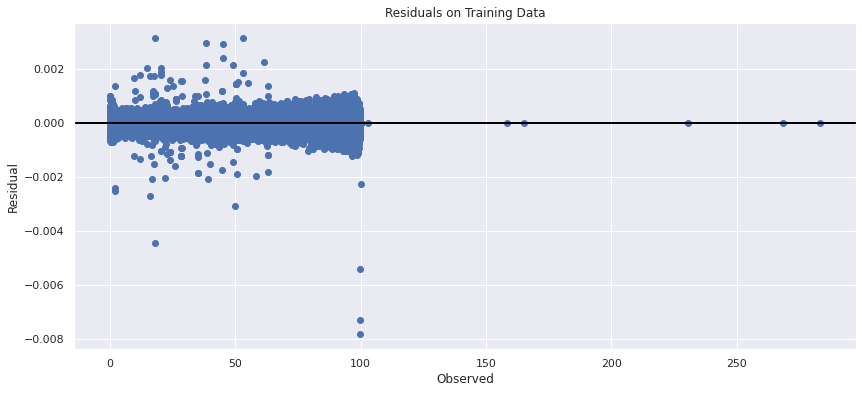

In [274]:
# Evaluating training model
predicted = dt.predict(X_train)
residuals = y_train-predicted

fig, ax = plt.subplots()
ax.scatter(y_train, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.title('Residuals on Training Data')
plt.show()

In [270]:
from sklearn.metrics import mean_squared_error
best_dtm_model = dt
# Prediction for 2019
y_pred = dt.predict(X_test)
residuals = y_test - y_pred


r2_score = best_dtm_model.score(X_test,y_test)
print("R-squared:{:.3f}".format(r2_score))
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))

R-squared:1.000
MSE: 0.00


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '2019 Prediction Residuals')

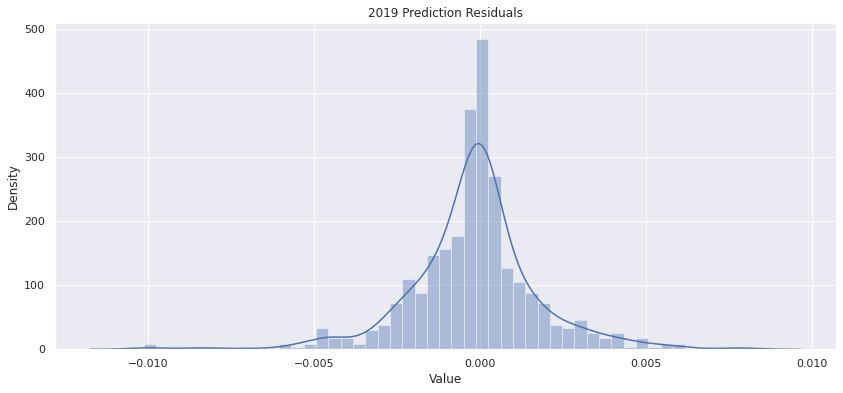

In [271]:
# distribution of residuals for 2019
sns.distplot(residuals)
plt.title('2019 Prediction Residuals')

In [84]:
y_test

3403      4.0
3404      4.0
3405      4.0
80350     4.0
80351     4.0
         ... 
188335    4.0
188336    4.0
188337    4.0
188338    4.0
188339    4.0
Name: Value, Length: 639, dtype: float64

Hierrachical Classification

In [105]:
#groupby
dfg=df.groupby(['Time_Detail','GeoAreaName','Target','Indicator','SeriesCode','Sex'])['Value'].sum().reset_index(drop=False)

In [106]:
dfg.head()

,Time_Detail,GeoAreaName,Target,Indicator,SeriesCode,Sex,Value
0,2000,Albania,4.0,4.1.1,SE_TOT_PRFL,4,24.0
1,2000,Albania,4.0,4.1.2,SE_TOT_CPLR,4,120.0
2,2000,Albania,4.0,4.2.2,SE_PRE_PARTN,4,4.0
3,2000,Albania,4.0,4.5.1,SE_AGP_CPRA,4,12.0
4,2000,Albania,4.0,4.5.1,SE_ALP_CPLR,4,12.0


In [108]:
# create the bottom level id
dfg["countryall"] = dfg.apply(lambda x: f"{x['GeoAreaName']}_{x['Target']}_{x['Indicator']}_{x['SeriesCode']}_{x['Sex']}", axis=1)

In [111]:
dfg

,Time_Detail,GeoAreaName,Target,Indicator,SeriesCode,Sex,Value,countryall
0,2000,Albania,4.0,4.1.1,SE_TOT_PRFL,4,24.0,Albania_4.0_4.1.1_SE_TOT_PRFL_4
1,2000,Albania,4.0,4.1.2,SE_TOT_CPLR,4,120.0,Albania_4.0_4.1.2_SE_TOT_CPLR_4
2,2000,Albania,4.0,4.2.2,SE_PRE_PARTN,4,4.0,Albania_4.0_4.2.2_SE_PRE_PARTN_4
3,2000,Albania,4.0,4.5.1,SE_AGP_CPRA,4,12.0,Albania_4.0_4.5.1_SE_AGP_CPRA_4
4,2000,Albania,4.0,4.5.1,SE_ALP_CPLR,4,12.0,Albania_4.0_4.5.1_SE_ALP_CPLR_4
...,...,...,...,...,...,...,...,...
11223,2019,Zimbabwe,4.0,4.1.1,SE_TOT_PRFL,4,12.0,Zimbabwe_4.0_4.1.1_SE_TOT_PRFL_4
11224,2019,Zimbabwe,4.0,4.2.1,SE_DEV_ONTRK,4,12.0,Zimbabwe_4.0_4.2.1_SE_DEV_ONTRK_4
11225,2019,Zimbabwe,4.0,4.4.1,SE_ADT_ACTS,4,72.0,Zimbabwe_4.0_4.4.1_SE_ADT_ACTS_4
11226,2019,Zimbabwe,4.0,4.5.1,SE_TOT_GPI,4,4.0,Zimbabwe_4.0_4.5.1_SE_TOT_GPI_4
